In [29]:
import pandas as pd
import numpy as np
import numpy as np
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
import os
import time
import pickle

In [2]:
df = pd.read_csv("phishwebsites.csv")

In [3]:
df.head()

,Unnamed: 0,index,url,@_symbol,ip_as_url,hexadecimal_character,url_length,multiple_//,domain_name_check,domain_name_in_path,server_form_check,abnormal_url_shortening,downloadable_malicious_code,abnormal_cookie_domain,age_of_domain,ssl_certificate,port_behaviour,blacklist_domain,is_phish
0,0,0,google.com,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,1,microsoft.com,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2,2,www.google.com,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,3,3,data.microsoft.com,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,4,4,windowsupdate.com,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [4]:
df2 = df[df.columns[3:]]
print(df2)

      @_symbol  ip_as_url  hexadecimal_character  url_length  multiple_//  \
0            0          0                      0           0            0   
1            0          0                      0           0            0   
2            0          0                      0           0            0   
3            0          0                      0           0            0   
4            0          0                      0           0            0   
...        ...        ...                    ...         ...          ...   
4915         0          0                      0           0            0   
4916         0          0                      0           0            0   
4917         0          0                      0           1            0   
4918         0          0                      0           0            0   
4919         0          0                      0           1            0   

      domain_name_check  domain_name_in_path  server_form_check  \
0       

In [5]:
X = df2.iloc[:, 0:-1].values
y = df2.iloc[:, -1]

In [6]:
print(X)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 0]]


In [7]:
print(y)

0       0
1       0
2       0
3       0
4       0
       ..
4915    1
4916    1
4917    1
4918    1
4919    1
Name: is_phish, Length: 4920, dtype: int64


/opt/conda/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='is_phish', ylabel='count'>

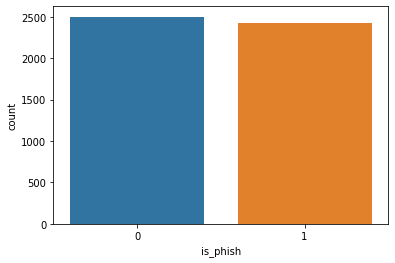

In [8]:
sns.countplot(df['is_phish'])

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

lr=LogisticRegression()
lr.fit(X_train,y_train)
start_time = time.time()
pred=lr.predict(X_test)
print("--- %s seconds ---" % (time.time() - start_time))
accuracy_score(pred,y_test)

--- 0.00033283233642578125 seconds ---


0.9092140921409214

In [40]:
from sklearn import svm
from sklearn.model_selection import cross_val_score
from sklearn import metrics
clf = svm.SVC(kernel='linear', C=1, random_state=42)
scores = cross_val_score(clf, X, y, cv=5)
print(scores)
scores = cross_val_score(clf, X, y, cv=5, scoring='f1_macro')
print(scores)

[0.92276423 0.93089431 0.89634146 0.90447154 0.87906504]
[0.92267191 0.93087603 0.89561658 0.90428016 0.87903693]


In [41]:
from sklearn.model_selection import ShuffleSplit
n_samples = X.shape[0]
cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=0)
cross_val_score(clf, X, y, cv=cv)

array([0.91598916, 0.90311653, 0.899729  , 0.91395664, 0.90921409])

In [11]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=3)

model= knn.fit(X_train,y_train)

start_time = time.time()
knn_predict=model.predict(X_test)
print("--- %s seconds ---" % (time.time() - start_time))

--- 0.14754366874694824 seconds ---


In [12]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

accuracy_score(knn_predict,y_test)

0.9098915989159891

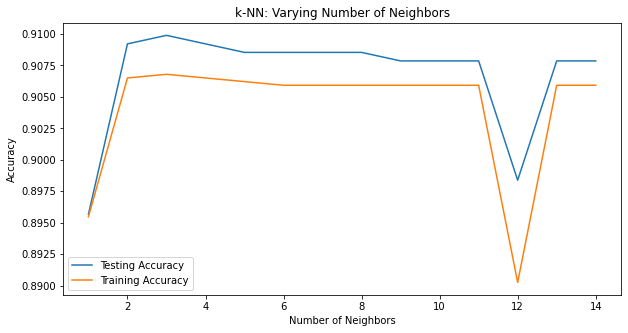

In [13]:
neighbors = np.arange(1, 15)

train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# Loop over different values of k
for i, k in enumerate(neighbors):
    # Setup a k-NN Classifier with k neighbors: knn
    knn = KNeighborsClassifier(n_neighbors= k )

    # Fit the classifier to the training data
    knn.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)

    #Compute accuracy on the testing set
    test_accuracy[i] = knn.score(X_test, y_test)

# Generate plot
plt.figure(figsize=(10,5))
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

In [14]:
from sklearn.naive_bayes import BernoulliNB
clf = BernoulliNB()
clf.fit(X_train, y_train)
start_time = time.time()
naive_predict=clf.predict(X_test)
print("--- %s seconds ---" % (time.time() - start_time))
accuracy_score(naive_predict,y_test)

--- 0.000606536865234375 seconds ---


0.8861788617886179

In [33]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(max_depth=10, random_state=0)
forest_clf.fit(X_train,y_train)
start_time = time.time()
ran_pred=forest_clf.predict(X_test)
print("--- %s seconds ---" % (time.time() - start_time))
accuracy_score(ran_pred,y_test)

--- 0.02309560775756836 seconds ---


0.9098915989159891

In [30]:
filename = 'cybersecuritymodel.sav'
pickle.dump(forest_clf, open(filename, 'wb'))

In [31]:
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, y_test)
print(result)

0.9098915989159891


In [16]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)
{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}

In [17]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [18]:
rf_random.best_params_

{'n_estimators': 400,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 30,
 'bootstrap': True}

In [19]:
forest_clf = RandomForestClassifier(bootstrap=True,max_depth=30,max_features='sqrt',min_samples_leaf=1,min_samples_split=5,n_estimators=400)
forest_clf.fit(X_train,y_train)
start_time = time.time()
ran_pred=forest_clf.predict(X_test)
print("--- %s seconds ---" % (time.time() - start_time))
accuracy_score(ran_pred,y_test)

--- 0.08809566497802734 seconds ---


0.9098915989159891

In [20]:
from sklearn.model_selection import GridSearchCV 
from sklearn.svm import SVC
param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf']}  
  
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3) 
  
# fitting the model for grid search 
grid.fit(X_train,y_train) 

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.2s
[CV 2/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.2s
[CV 3/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.2s
[CV 4/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.2s
[CV 5/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.2s
[CV 1/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   0.2s
[CV 2/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   0.2s
[CV 3/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   0.2s
[CV 4/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   0.2s
[CV 5/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   0.2s
[CV 1/5] END ..................C=0.1, gamma=0.01, kernel=rbf; total time=   0.5s
[CV 2/5] END ..................C=0.1, gamma=0.0

[CV 2/5] END ....................C=1000, gamma=1, kernel=rbf; total time=   0.1s
[CV 3/5] END ....................C=1000, gamma=1, kernel=rbf; total time=   0.1s
[CV 4/5] END ....................C=1000, gamma=1, kernel=rbf; total time=   0.1s
[CV 5/5] END ....................C=1000, gamma=1, kernel=rbf; total time=   0.1s
[CV 1/5] END ..................C=1000, gamma=0.1, kernel=rbf; total time=   0.1s
[CV 2/5] END ..................C=1000, gamma=0.1, kernel=rbf; total time=   0.1s
[CV 3/5] END ..................C=1000, gamma=0.1, kernel=rbf; total time=   0.1s
[CV 4/5] END ..................C=1000, gamma=0.1, kernel=rbf; total time=   0.1s
[CV 5/5] END ..................C=1000, gamma=0.1, kernel=rbf; total time=   0.1s
[CV 1/5] END .................C=1000, gamma=0.01, kernel=rbf; total time=   0.1s
[CV 2/5] END .................C=1000, gamma=0.01, kernel=rbf; total time=   0.1s
[CV 3/5] END .................C=1000, gamma=0.01, kernel=rbf; total time=   0.1s
[CV 4/5] END ...............

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [21]:
grid.best_params_

{'C': 1, 'gamma': 1, 'kernel': 'rbf'}

In [22]:
from sklearn.svm import SVC
svm_clf =SVC(C=1, gamma=1, kernel='rbf')
svm_clf.fit(X_train,y_train)
start_time = time.time()
pred=svm_clf.predict(X_test)
print("--- %s seconds ---" % (time.time() - start_time))
accuracy_score(pred,y_test)

--- 0.07190608978271484 seconds ---


0.9092140921409214

In [23]:
# #Dependencies
import keras
from keras.models import Sequential
from keras.layers import Dense
# Neural network
model = Sequential()
model.add(Dense(16, input_dim=15, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(1, activation='softmax'))

In [24]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [25]:
history = model.fit(X_train,y_train,batch_size=1,epochs=10)

Epoch 1/10
3444/3444 [==============================] - 2s 547us/step - loss: 0.0000e+00 - accuracy: 0.4988
Epoch 2/10
3444/3444 [==============================] - 2s 536us/step - loss: 0.0000e+00 - accuracy: 0.5106
Epoch 3/10
3444/3444 [==============================] - 2s 540us/step - loss: 0.0000e+00 - accuracy: 0.5043
Epoch 4/10
3444/3444 [==============================] - 2s 519us/step - loss: 0.0000e+00 - accuracy: 0.5055
Epoch 5/10
3444/3444 [==============================] - 2s 493us/step - loss: 0.0000e+00 - accuracy: 0.4926
Epoch 6/10
3444/3444 [==============================] - 2s 492us/step - loss: 0.0000e+00 - accuracy: 0.5003
Epoch 7/10
3444/3444 [==============================] - 2s 511us/step - loss: 0.0000e+00 - accuracy: 0.4913
Epoch 8/10
3444/3444 [==============================] - 2s 529us/step - loss: 0.0000e+00 - accuracy: 0.5029
Epoch 9/10
3444/3444 [==============================] - 2s 530us/step - loss: 0.0000e+00 - accuracy: 0.4877
Epoch 10/10
3444/3444 [=====

In [26]:
start_time = time.time()
y_pred = model.predict(X_test)
print("--- %s seconds ---" % (time.time() - start_time))

--- 0.09763216972351074 seconds ---


In [27]:
accuracy_score(y_pred,y_test)

0.47289972899729

In [32]:
p = [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0]]

In [34]:
ran_pred=forest_clf.predict(p)

In [35]:
ran_pred

array([1])